In [1]:
from ias.Datasets import Emnist
from ias.DecisionTrees.RandomDecisionTree import RandomDecisionTree
from ias.Metrics import accuracy_score, confusion_matrix, show_confusion_matrix
from ias.PCA import PCA

In [2]:
import numpy as np

In [3]:
indices = np.arange(len(Emnist.attributes))
np.random.shuffle(indices)
train_size = int(1000)

train_i = indices[:train_size]
train_x = Emnist.attributes[train_i]
train_y = Emnist.labels[train_i]

test_i = indices[train_size:]
test_x = Emnist.attributes[test_i]
test_y = Emnist.labels[test_i]

In [4]:
pca = PCA(0.90)
pca.fit(train_x)

In [5]:
compressed_train_x = pca.compress(train_x)
compressed_test_x = pca.compress(test_x)

In [6]:
tree = RandomDecisionTree()
tree.fit(compressed_train_x, train_y)

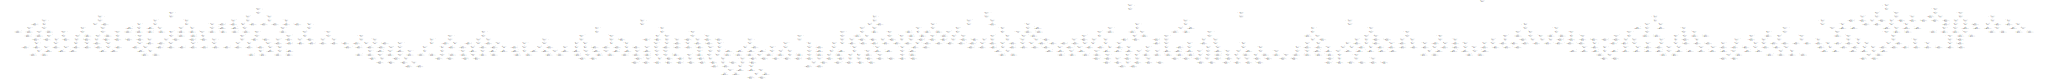

In [7]:
d = tree.show(class_name=Emnist.class_names)
d.render("random_emnist")
d

0.3836

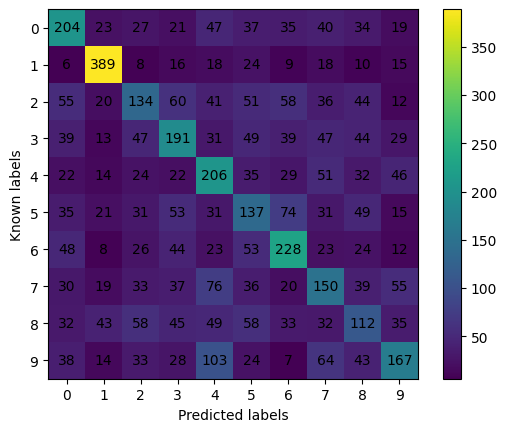

In [8]:
show_confusion_matrix(confusion_matrix(Emnist.class_number, test_y[:5000],
                                       tree.predict(compressed_test_x[:5000])),
                      Emnist.class_names)
accuracy_score(test_y[:5000], tree.predict(compressed_test_x[:5000]))

1.0

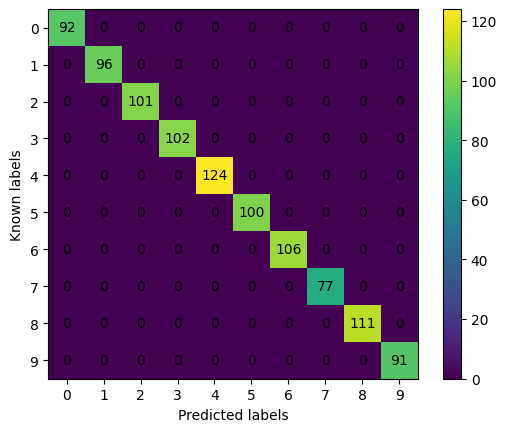

In [9]:
show_confusion_matrix(confusion_matrix(Emnist.class_number, train_y,
                                       tree.predict(compressed_train_x)),
                      Emnist.class_names)
accuracy_score(train_y, tree.predict(compressed_train_x))